# Flight Price Prediction

Description: In this dataset Dependet variables contains the descrate continues values, Dependent variables is Flight ticket "Price" and feature variables given below


Features Variables -

    Airline
    Date_of_Journey
    Source
    Destination
    Route
    Dep_Time
    Arrival_Time
    Duration
    Total_Stops
    Additional_Info
    Price

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [194]:
# reading the Excel file 
df_train = pd.read_excel('flight_Data_Train.xlsx')
df_test = pd.read_excel('flight_Test_set.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [195]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [196]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [197]:
print(df_train.shape, df_test.shape)

(10683, 11) (2671, 10)


Observation: 
1. Data training set contains 10683 records and 11 variables
2. Data test set contains the 2671 records and 10 variables
    

In [198]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


Observation: 
1. dataset contains one interger, 11 object data types

In [199]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [200]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Observation:
Variables "Total_Stops ,Route, contians the null values

In [201]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Obseravtion : Test dataset contains no the null values 

#### Data preprocessing 

In [202]:
#droping the null values(We have only 2 null values so we droping it)
df_train.dropna(inplace = True)

In [203]:
df_train['Date'] = df_train['Date_of_Journey'].str.split('/').str[0]
df_train['Month'] = df_train['Date_of_Journey'].str.split('/').str[1]
df_train['Year'] = df_train['Date_of_Journey'].str.split('/').str[2]

df_test['Date'] = df_test['Date_of_Journey'].str.split('/').str[0]
df_test['Month'] = df_test['Date_of_Journey'].str.split('/').str[1]
df_test['Year'] = df_test['Date_of_Journey'].str.split('/').str[2]

In [204]:
# Spliting journey time hour and minutes
df_train['Hour'] = df_train['Duration'].str.split(' ').str[0]
df_train['Minutes'] = df_train['Duration'].str.split(' ').str[1]

df_test['Hour'] = df_test['Duration'].str.split(' ').str[0]
df_test['Minutes'] = df_test['Duration'].str.split(' ').str[1]


In [205]:
# removing  Hour h and minutes m from the columns 
df_train['Hour'] = df_train['Hour'].str.replace(r'\D+', '')
df_train['Minutes'] = df_train['Minutes'].str.replace(r'\D+', '')

df_test['Hour'] = df_test['Hour'].str.replace(r'\D+', '')
df_test['Minutes'] = df_test['Minutes'].str.replace(r'\D+', '')

In [206]:
#filling the missing Minutes with Zero values 
df_train['Minutes'].fillna(0, inplace=True)
df_test['Minutes'].fillna(0, inplace=True)

In [207]:
# Spliting journey time hour and minutes
df_train['Dep_Hour'] = df_train['Dep_Time'].str.split(':').str[0]
df_train['Dep_Minutes'] = df_train['Dep_Time'].str.split(':').str[1]

df_test['Dep_Hour'] = df_test['Dep_Time'].str.split(':').str[0]
df_test['Dep_Minutes'] = df_test['Dep_Time'].str.split(':').str[1]


In [208]:
"""df_train['Arrival_Time']=pd.to_datetime(df_train['Arrival_Time'])
df_test['Arrival_Time']=pd.to_datetime(df_test['Arrival_Time'])

df_train['A_Date'] = df_train['Arrival_Time'].str.split(' ').str[1]
df_train['A_time'] = df_train['Arrival_Time'].str.split(' ').str[0]

df_test['A_Date'] = df_test['Arrival_Time'].str.split(' ').str[1]
df_test['A_time'] = df_test['Arrival_Time'].str.split(' ').str[0]"""

"df_train['Arrival_Time']=pd.to_datetime(df_train['Arrival_Time'])\ndf_test['Arrival_Time']=pd.to_datetime(df_test['Arrival_Time'])\n\ndf_train['A_Date'] = df_train['Arrival_Time'].str.split(' ').str[1]\ndf_train['A_time'] = df_train['Arrival_Time'].str.split(' ').str[0]\n\ndf_test['A_Date'] = df_test['Arrival_Time'].str.split(' ').str[1]\ndf_test['A_time'] = df_test['Arrival_Time'].str.split(' ').str[0]"

In [209]:
df_train['Date'] = df_train['Date_of_Journey'].str.split('/').str[0]
df_train['Month'] = df_train['Date_of_Journey'].str.split('/').str[1]
df_train['Year'] = df_train['Date_of_Journey'].str.split('/').str[2]

df_test['Date'] = df_test['Date_of_Journey'].str.split('/').str[0]
df_test['Month'] = df_test['Date_of_Journey'].str.split('/').str[1]
df_test['Year'] = df_test['Date_of_Journey'].str.split('/').str[2]

In [210]:
df_train.drop(['Date_of_Journey','Dep_Time','Duration','Arrival_Time'], axis=1, inplace=True)
df_test.drop(['Date_of_Journey','Dep_Time','Duration','Arrival_Time'], axis=1, inplace=True)

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


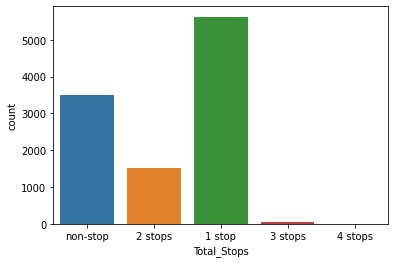

In [211]:
#Univarient analysis
print(df_train['Total_Stops'].value_counts())
sns.countplot(df_train['Total_Stops'])
plt.show()


Observation: Highest number of flights have single stops 

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


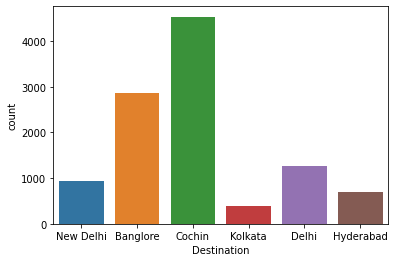

In [212]:
#Univarient analysis
print(df_train['Destination'].value_counts())
sns.countplot(df_train['Destination'])
plt.show()


Observation: Cochin have highest number of destination flights 

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


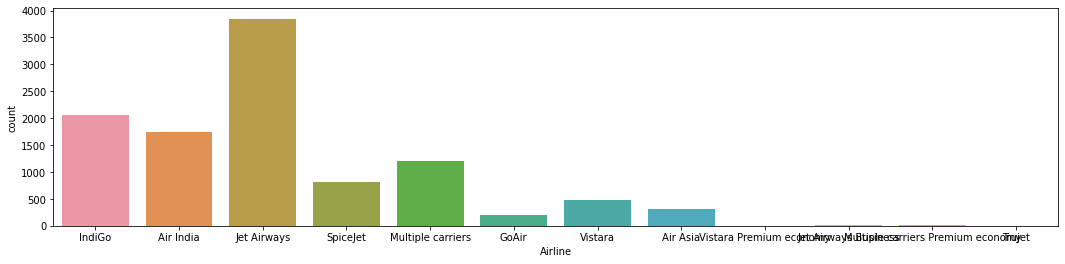

In [213]:
#Univarient analysis
fig=plt.figure(figsize=(18,4))
print(df_train['Airline'].value_counts())
sns.countplot(df_train['Airline'])
plt.show()


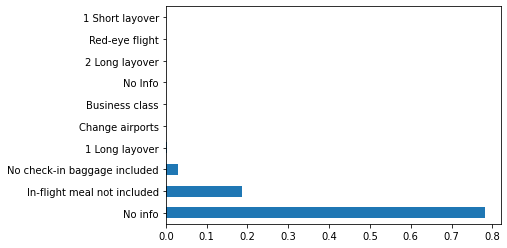

In [217]:
df_train['Additional_Info'].value_counts(normalize=True)[:20].plot(kind='barh')

In [218]:
df_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [219]:
df_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [220]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10682.0,9087.214567,4611.54881,1759.0,5277.0,8372.0,12373.0,79512.0


Observation: Mean is greater then mode

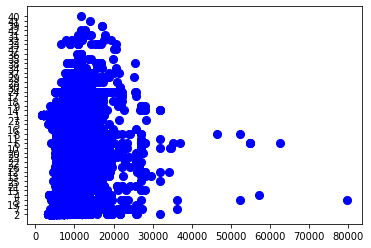

In [221]:
# Multivarient analysis
plt.scatter(df_train["Price"], df_train["Hour"], color = "b", s = 65)
plt.show()

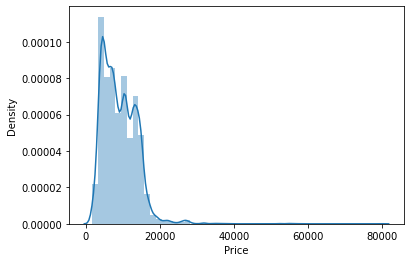

In [222]:
sns.distplot(df_train['Price'])
plt.show()

OBservation: Price of the flights ticket right skewed 

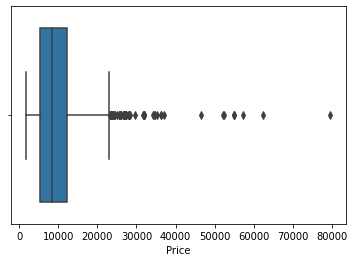

In [223]:
sns.boxplot(df_train['Price'])
plt.show()

We See clearly some of the outlier in the target variables 

In [224]:
 #Encoding the Cateogorical variables 
#label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()


df_train['Airline'] = le.fit_transform(df_train['Airline'])
df_train['Source'] = le.fit_transform(df_train['Source'])
df_train['Destination'] = le.fit_transform(df_train['Destination'])
df_train['Route'] = le.fit_transform(df_train['Route'])
df_train['Total_Stops'] = le.fit_transform(df_train['Total_Stops'])
df_train['Additional_Info'] = le.fit_transform(df_train['Additional_Info'])



df_test['Airline'] = le.fit_transform(df_test['Airline'])
df_test['Source'] = le.fit_transform(df_test['Source'])
df_test['Destination'] = le.fit_transform(df_test['Destination'])
df_test['Route'] = le.fit_transform(df_test['Route'])
df_test['Total_Stops'] = le.fit_transform(df_test['Total_Stops'])
df_test['Additional_Info'] = le.fit_transform(df_test['Additional_Info'])


In [225]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Year,Hour,Minutes,Dep_Hour,Dep_Minutes
0,4,2,1,76,0,5,6,06,2019,10,55,17,30
1,3,3,0,65,0,5,12,05,2019,4,0,06,20
2,4,2,1,76,0,3,21,05,2019,23,45,19,15
3,6,2,1,76,0,5,21,05,2019,13,0,08,00
4,0,0,2,16,4,5,24,06,2019,2,50,23,55


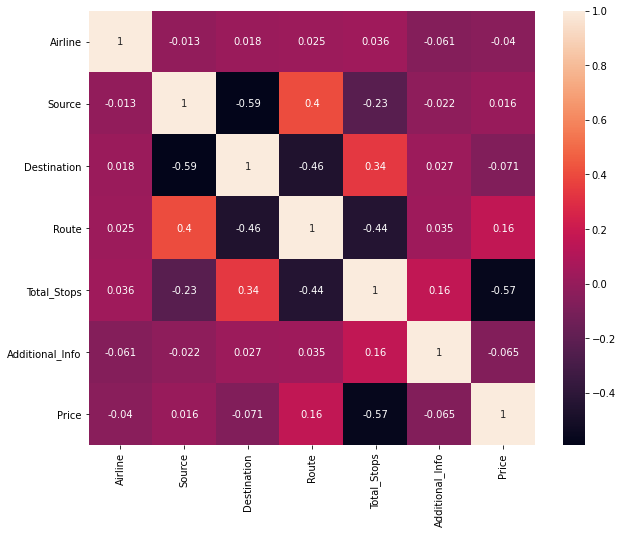

In [226]:
#To check the corr_mat  Heatmap
corr_hmap=df_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_hmap, annot=True)
plt.show()

OBservation : We clearly serr that only two variables have positive relation with route, source

Destination have positve corelation with total stops

In [227]:

#Spliting the data into Feature variables (X) and target variables (y)
x = df_train.drop(['Price'],axis=1)
y = df_train['Price']

In [228]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Hour,Minutes,Dep_Hour,Dep_Minutes
0,3,0,5,18,4,8,3897,24,03,2019,2,50,22,20
1,1,3,0,84,1,8,7662,1,05,2019,7,25,05,50
2,4,2,1,118,1,8,13882,9,06,2019,19,0,09,25
3,3,3,0,91,0,8,6218,12,05,2019,5,25,18,05
4,3,0,5,29,0,8,13302,01,03,2019,4,45,16,50


#### Spliting the data into train_test_split

In [229]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

#### Building  Model

In [230]:
#importing the libraries 
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(x_train, y_train)
y_pred = Regressor.predict(x_test)

r_sq = Regressor.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', Regressor.intercept_)
print('coefficients:', Regressor.coef_)

coefficient of determination: 0.4206085199201172
intercept: 10354.24861729909
coefficients: [ 6.77705118e+01 -2.86868222e+02  1.85870457e+02 -4.44679333e+00
 -1.16264207e+03  2.26064252e+02 -7.20899526e+01 -3.11768599e+02
  2.27373675e-13  1.54491208e+02 -9.39220327e+00  2.50994912e+01
 -2.61493026e+00]


In [231]:
Model = []
MMSE=[]
MSE=[]
RMSE=[]
R_Square=[]


# calculate MAE, MSE, RMSE
print("MAE  : ",metrics.mean_absolute_error(y_test, y_pred))
print("MSE  : ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model.append('Linear Regression')
R_Square.append(r_sq)
r_sq = Regressor.score(x, y)
MMSE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE  :  2553.953170510764
MSE  :  13784936.137346044
RMSE :  3712.80704283781


In [232]:
#Decision Tree model 
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
# make a prediction
yhat = model.predict(x_test)
# summarize prediction
print(yhat)

[ 4784.          4392.          5380.         ... 11507.
 14781.          7546.33333333]


In [233]:

# calculate MAE, MSE, RMSE
print("MAE  : ",metrics.mean_absolute_error(y_test, yhat))
print("MSE  : ", metrics.mean_squared_error(y_test, yhat))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, yhat)))

Model.append('DecisionTreeRegressor')
R_Square.append(r_sq)
MMSE.append(metrics.mean_absolute_error(y_test, yhat))
MSE.append(metrics.mean_squared_error(y_test, yhat))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, yhat)))

MAE  :  723.6866323506473
MSE  :  4771011.350283367
RMSE :  2184.264487255004


In [234]:
# SVM model 
from sklearn.svm import LinearSVR
model_SVR = LinearSVR()

model_SVR.fit(x_train, y_train)
yhat_SVR = model_SVR.predict(x_test)

print('Predicted: %s' % yhat_SVR)

Model.append('SVRRegressor')
R_Square.append(r_sq)
MMSE.append(metrics.mean_absolute_error(y_test, yhat_SVR))
MSE.append(metrics.mean_squared_error(y_test, yhat_SVR))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, yhat_SVR)))

Predicted: [ 6317.89627516  5031.81705944 10717.60577925 ...  9041.06943065
  9846.95545005  6387.30255062]


In [235]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFR.fit(x_train, y_train)
y_predRFR =RFR.predict(x_test)


# calculate MAE, MSE, RMSE
print("MAE  : ",metrics.mean_absolute_error(y_test, y_predRFR))
print("MSE  : ", metrics.mean_squared_error(y_test, y_predRFR))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))

Model.append('RandomForestRegressor')
R_Square.append(r_sq)
MMSE.append(metrics.mean_absolute_error(y_test, y_predRFR))
MSE.append(metrics.mean_squared_error(y_test, y_predRFR))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_predRFR)))


MAE  :  673.5031640929652
MSE  :  2161252.152291485
RMSE :  1470.1197748113877


In [236]:
AccuracyTable=pd.DataFrame({'Model':Model,
                        'MMSE':MMSE,
                        'MSE': MSE, 
                        'RMSE': RMSE,
                      
                       })
AccuracyTable

,Model,MMSE,MSE,RMSE
0,Linear Regression,2553.953171,1.378494e+07,3712.807043
1,DecisionTreeRegressor,723.686632,4.771011e+06,2184.264487
2,SVRRegressor,2710.060781,1.495549e+07,3867.232343
3,RandomForestRegressor,673.503164,2.161252e+06,1470.119775


In [238]:
pd.DataFrame(Regressor.predict(df_test), columns = ['Price']).to_excel("Regressor.xlsx", index = True)

#### Saving the Model----


In [192]:
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(Regressor, 'Regressor.pkl')
  
# Load the model from the file
Regressor_joblib = joblib.load('Regressor.pkl') 
  
# Use the loaded model to make predictions
#Regressor_joblib.predict(x_test)